In [1]:
# First, our import statements.
import pandas as pd
import numpy as np
from ptsa.data.filters import MorletWaveletFilter

# The CMLLoad class is your gateway to the experimental data, including channels, events, and eeg data.
from CMLLoad import CMLLoad

# We need to tell CMLLoad what directory contains the experimental data files.
# Point this to where they are on your system.
load = CMLLoad('./CMLExamples')

df = load.Index()

In [2]:
ltpFR2_df = df.query('experiment == "ltpFR2"')
ltpFR2_df['subject'].unique()

array(['LTP093', 'LTP123', 'LTP210', 'LTP246'], dtype=object)

In [3]:
evs = load.Load(ltpFR2_df.iloc[0], 'events')
word_evs = evs[evs['type']=='WORD']
chansel = ['E7', 'E106', 'E31', 'E80', 'E55']
#chansel = np.ones(133, np.bool)
#chansel[129:] = False
#chansel = ['E7', 'E106', 'Cz', 'E31', 'E80', 'E55']


In [4]:
buf = 1000
ev_start = 200
ev_len = 700
eeg = load.LoadPTSA(ltpFR2_df.iloc[0], ev_start=ev_start-buf, ev_len=ev_len+2*buf)
#eeg = eeg[word_evs.index].sel(channel=chansel)
eeg = eeg[word_evs.index].sel(channel=np.array([c in chansel for c in eeg.channel]))

In [5]:
#chansel = np.zeros(6, np.bool)
#chansel[5] = True
#np.sum(eeg.sel(channel=chansel)==0)eeg[~np.any(eeg==0, axis=(1,2))]

#evssel = np.zeros(576, np.bool)
#evssel[:3] = True
#eeg.sel(event=evssel)
#eeg

In [6]:
freqs = np.geomspace(2, 200, 15)
freqs

array([  2.        ,   2.77899099,   3.86139546,   5.36539159,
         7.45518744,  10.35894936,  14.39371346,  20.        ,
        27.78990989,  38.61395458,  53.65391591,  74.55187441,
       103.58949358, 143.9371346 , 200.        ])

In [7]:
eegpow = MorletWaveletFilter(eeg, freqs, output='power').filter()

CPP total time wavelet loop:  1.494189739227295


In [8]:
eegpow = eegpow.remove_buffer(1)

In [9]:
eegpow

<xarray.TimeSeries (frequency: 15, event: 576, channel: 5, time: 350)>
array([[[[1.268499e-05, ..., 1.165516e-05],
         ...,
         [1.727534e-06, ..., 1.231158e-06]],

        ...,

        [[3.144785e-05, ..., 3.246812e-05],
         ...,
         [3.854564e-05, ..., 3.653803e-05]]],


       ...,


       [[[1.080047e-10, ..., 8.894250e-11],
         ...,
         [2.103011e-10, ..., 2.242507e-10]],

        ...,

        [[3.668786e-10, ..., 5.166272e-10],
         ...,
         [2.373873e-10, ..., 1.649746e-10]]]])
Coordinates:
  * channel     (channel) <U7 'E7' 'E31' 'E55' 'E80' 'E106'
  * time        (time) float64 200.0 202.0 204.0 206.0 ... 894.0 896.0 898.0
  * event       (event) object {'Index': 6, 'eegoffset': 285929, 'answer': -999, 'begin_distractor': 0, 'begin_math_correct': -999, 'eegfile': '/protocols/ltp/subjects/LTP093/experiments/ltpFR2/sessions/0/ephys/current_processed/LTP093 20140902 0959.2.raw', 'eogArtifact': 1, 'experiment': 'ltpFR2', 'final_distractor'

In [10]:
eegpow_mean = eegpow.mean('time')
eegpow_mean = np.log(eegpow_mean)

In [11]:
# z-transform
eegpow_mean -= eegpow_mean.mean('event')
eegpow_mean /= eegpow_mean.std('event')

In [12]:
#eegpow_mean[~np.any(np.isnan(eegpow_mean), axis=(1,2))]
#eegpow_mean = eegpow.mean('time')
eegpow_mean

<xarray.DataArray (frequency: 15, event: 576, channel: 5)>
array([[[ 0.324271, -0.160039, ..., -2.031389, -1.606499],
        [ 0.265426, -0.088133, ..., -1.808858, -1.122522],
        ...,
        [ 0.905812,  0.074823, ...,  0.317226,  0.511245],
        [ 0.823949,  0.137389, ...,  0.32552 ,  0.571704]],

       [[-0.81419 ,  0.39648 , ...,  0.187789,  1.696886],
        [-0.812923, -0.367657, ..., -0.054997,  0.97297 ],
        ...,
        [ 0.748127,  0.390233, ..., -1.106483,  0.410056],
        [ 1.615293,  0.184969, ...,  1.199722,  1.135325]],

       ...,

       [[-0.823108, -0.532495, ..., -0.666873, -0.577038],
        [-0.350946, -0.342336, ..., -0.424984, -0.764158],
        ...,
        [-0.503042,  1.967526, ..., -0.519848, -0.259394],
        [-0.296818,  1.841054, ..., -0.465974, -0.022426]],

       [[-0.544776, -0.901081, ..., -0.981262, -1.139244],
        [-0.613712, -0.871036, ..., -0.512629, -0.751468],
        ...,
        [-0.392787,  0.159954, ..., -0.55646

(array([2.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 1.000e+00, 1.000e+00, 6.000e+00, 4.000e+00, 1.000e+00,
        1.100e+01, 1.300e+01, 1.400e+01, 2.000e+01, 2.200e+01, 3.800e+01,
        4.400e+01, 8.000e+01, 9.300e+01, 1.130e+02, 1.780e+02, 1.860e+02,
        2.830e+02, 3.560e+02, 4.960e+02, 5.520e+02, 7.560e+02, 9.200e+02,
        1.125e+03, 1.282e+03, 1.545e+03, 1.784e+03, 1.936e+03, 2.110e+03,
        2.143e+03, 2.253e+03, 2.165e+03, 2.191e+03, 2.135e+03, 2.113e+03,
        1.983e+03, 1.845e+03, 1.723e+03, 1.652e+03, 1.541e+03, 1.345e+03,
        1.249e+03, 9.160e+02, 7.280e+02, 6.260e+02, 4.920e+02, 4.160e+02,
        3.350e+02, 2.410e+02, 2.050e+02, 2.060e+02, 1.330e+02, 1.240e+02,
        1.060e+02, 7.800e+01, 8.000e+01, 4.700e+01, 3.700e+01, 2.100e+01,
        2.000e+01, 9.000e+00, 4.000e+00, 1.000e+00, 9.000e+00, 8.000e+00,
        2.000e+00, 1.000e+00, 3.000e+00, 5.000e+00, 4.000e+00, 4.000e+00,
        4.000e+00, 1.000e+00, 1.000e+0

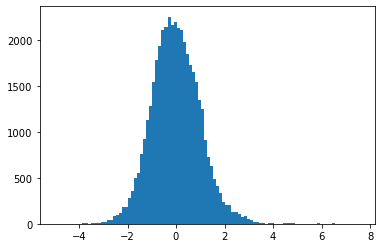

In [13]:
# Plot our results
%matplotlib inline
import matplotlib.pyplot as plt
plt.hist(np.ravel(eegpow_mean), 100)

In [14]:
features = eegpow_mean.stack(features=('frequency', 'channel'))

In [15]:
features

<xarray.DataArray (event: 576, features: 75)>
array([[ 0.324271, -0.160039, -1.974703, ..., -0.623596, -0.981262, -1.139244],
       [ 0.265426, -0.088133, -1.993337, ..., -0.023552, -0.512629, -0.751468],
       [ 0.207314, -0.110375, -2.016756, ..., -0.795499, -1.146484, -1.153012],
       ...,
       [ 0.870051,  0.070836,  1.481123, ..., -1.598195, -0.39232 , -0.599623],
       [ 0.905812,  0.074823,  1.468127, ..., -1.313671, -0.556463, -1.079266],
       [ 0.823949,  0.137389,  1.463588, ..., -0.785854, -0.796358, -0.764786]])
Coordinates:
  * event       (event) object {'Index': 6, 'eegoffset': 285929, 'answer': -999, 'begin_distractor': 0, 'begin_math_correct': -999, 'eegfile': '/protocols/ltp/subjects/LTP093/experiments/ltpFR2/sessions/0/ephys/current_processed/LTP093 20140902 0959.2.raw', 'eogArtifact': 1, 'experiment': 'ltpFR2', 'final_distractor': 24000, 'final_math_correct': 10, 'intruded': 0, 'intrusion': -999, 'iscorrect': -999, 'item_name': 'BALLOON', 'item_num': 75, 'l

In [16]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_auc_score

In [17]:
model = LogisticRegression(solver='liblinear')

In [18]:
word_evs['recalled'].mean()

0.3993055555555556

In [19]:
model.fit(features, word_evs['recalled'])

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='liblinear', tol=0.0001, verbose=0,
                   warm_start=False)

In [20]:
roc_auc_score(word_evs['recalled'], model.predict_proba(features)[:, 1])

0.772756974114099

In [21]:
model.predict_proba(features)[:, 1]

array([0.84328055, 0.75910294, 0.85148573, 0.55862595, 0.88423901,
       0.79989263, 0.96848552, 0.65301894, 0.86773772, 0.98321752,
       0.9292309 , 0.48002173, 0.80638226, 0.86875385, 0.63118444,
       0.83425804, 0.41166432, 0.71786258, 0.80105905, 0.97156174,
       0.6108451 , 0.76406187, 0.93404501, 0.68340757, 0.80743548,
       0.51679752, 0.62105173, 0.65825055, 0.95459371, 0.35587517,
       0.55081756, 0.38878253, 0.66496358, 0.64047625, 0.6051525 ,
       0.47004452, 0.58677367, 0.5989828 , 0.79657458, 0.72391767,
       0.63000993, 0.62523813, 0.79708371, 0.37359649, 0.78669392,
       0.52974733, 0.3121634 , 0.85143749, 0.77700514, 0.20150827,
       0.86741983, 0.81028866, 0.49234859, 0.65989568, 0.58661454,
       0.63648676, 0.15991141, 0.40291943, 0.3513896 , 0.19772822,
       0.14938593, 0.33053152, 0.20088257, 0.44142654, 0.64800399,
       0.31023476, 0.26656059, 0.39034304, 0.22808604, 0.75039704,
       0.28666011, 0.44031098, 0.41129286, 0.29750855, 0.18298

### Assignment 6

Train a regularized logistic regression to predict subsequent recall separately for each subject who participated in LTPFR2. Estimate the regularization parameter for each subject using nested crossvalidation. How well can you predict subsequent recall? If you feel ambitious do the same thing but using a SVC and compare the out-of sample performance.